# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [50]:
df = pd.read_csv('./../data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

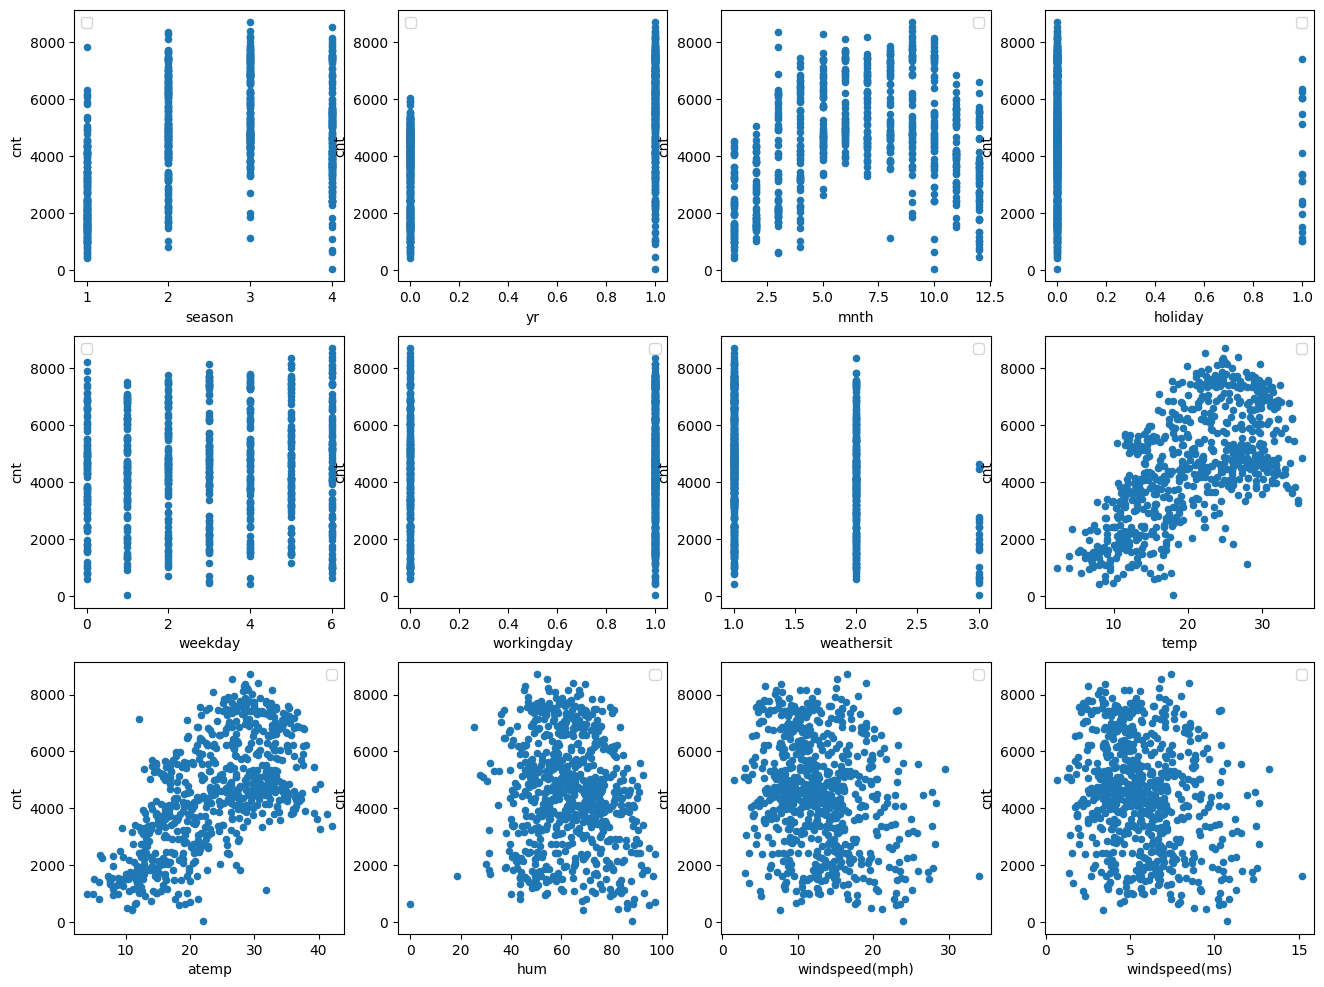

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: периодический

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: temp и atemp

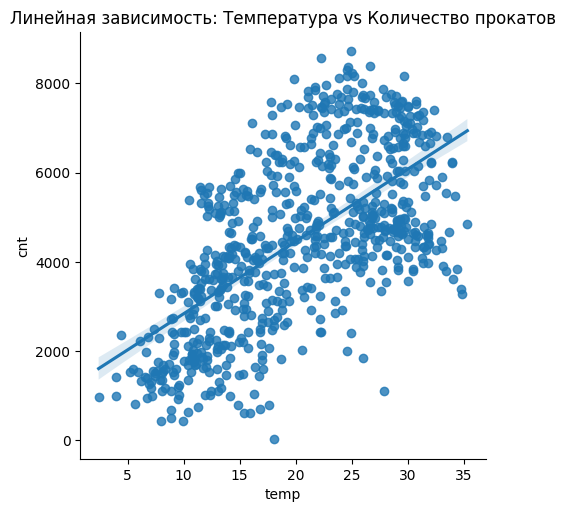

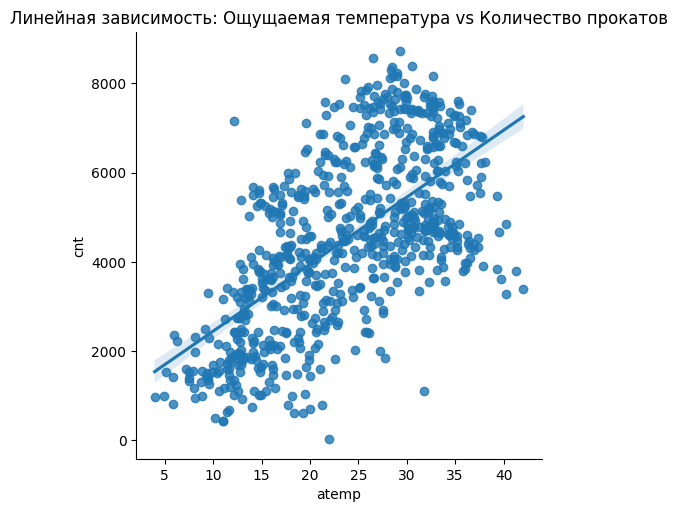

In [53]:
sns.lmplot(x='temp', y='cnt', data=df)
plt.title('Линейная зависимость: Температура vs Количество прокатов')
plt.show()

sns.lmplot(x='atemp', y='cnt', data=df)
plt.title('Линейная зависимость: Ощущаемая температура vs Количество прокатов')
plt.show()

## 2. Корреляционная матрица 

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:

Признаки с наименьшей корреляцией с `cnt`:

- holiday
- weekday
- workingday
- windspeed(mph) / windspeed(ms

Признаки с наибольшей корреляцией с `cnt`:

- temp
- atemp
- season

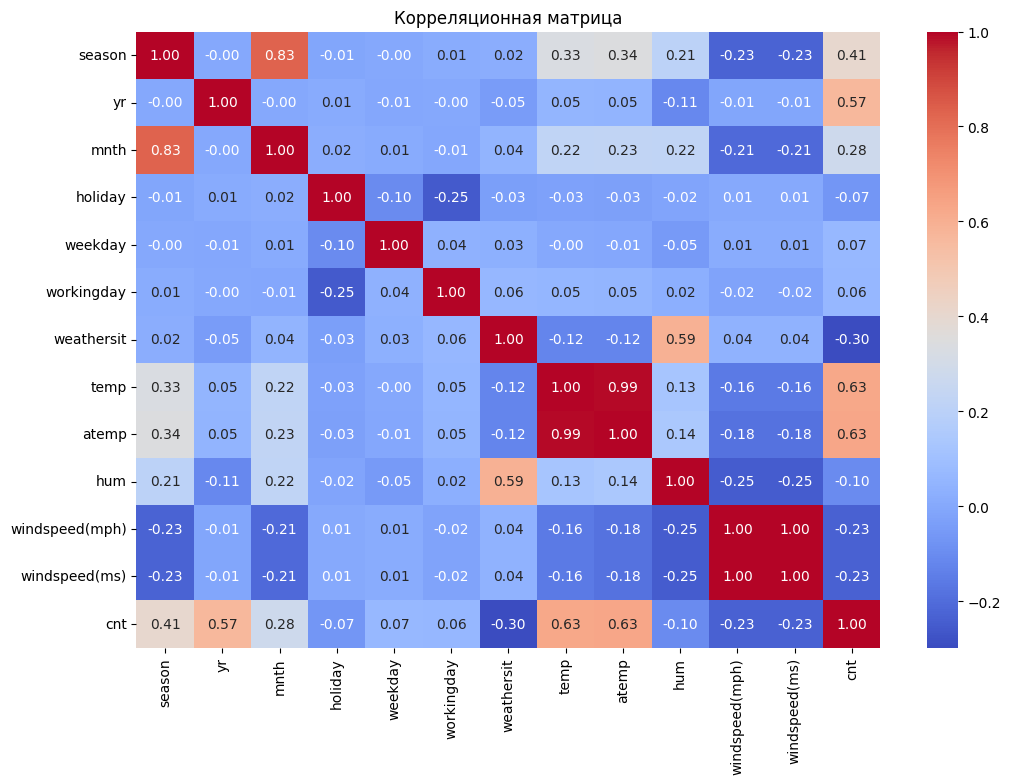

In [54]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

## 3. Barpot 

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Корреляция связана с ростом числа прокатов во втором году

<Figure size 1200x600 with 0 Axes>

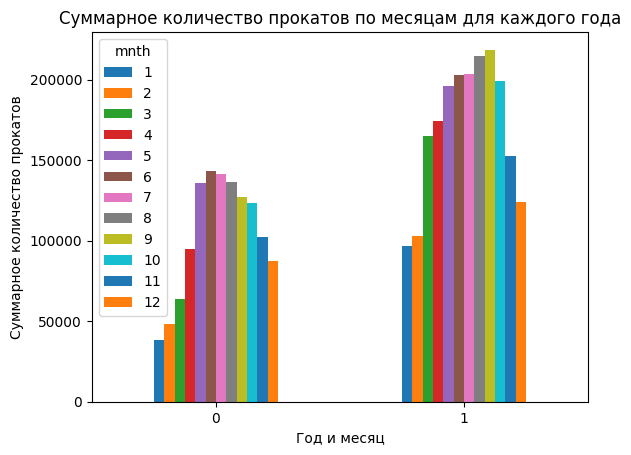

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.groupby(['yr', 'mnth'])['cnt'].sum().unstack().plot(kind='bar')
plt.xlabel('Год и месяц')
plt.ylabel('Суммарное количество прокатов')
plt.title('Суммарное количество прокатов по месяцам для каждого года')
plt.xticks(rotation=0)
plt.show()

## 4. Countplot 

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Датасет собран с примерно равномерным распределением по дням недели. По погодным условиям есть очень мало данных, когда есть плохая погода. Это близко к реалности.
    
Ответ: Распределение значений признака weekday близко к равномерному.

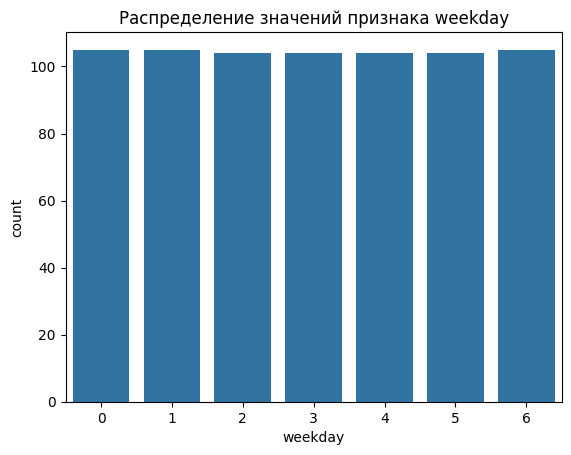

In [56]:
sns.countplot(df, x='weekday')
plt.title('Распределение значений признака weekday')
plt.show()

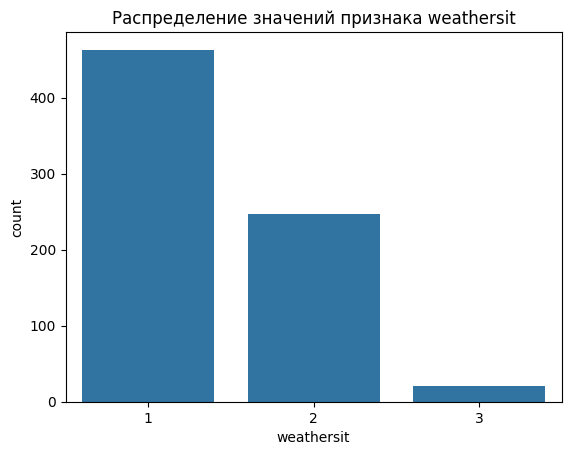

In [57]:
sns.countplot(df, x='weathersit')
plt.title('Распределение значений признака weathersit')
plt.show()

## 5. Распределение 

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: В среднем прокатов в день приблизительно 4000-5000

Ответ: Называется правосторонне асимметричным или близким к нормальному со смещением вправо

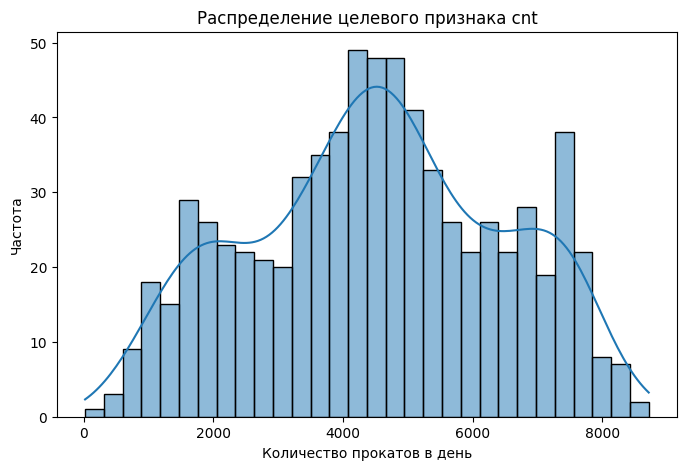

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x='cnt', bins=30, kde=True)
plt.xlabel('Количество прокатов в день')
plt.ylabel('Частота')
plt.title('Распределение целевого признака cnt')
plt.show()

## 6. Совместное распределение признаков 

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Присутствует выбросы (outliers), например, с температурой около 30 градусов и ощущаемой температурой около 12 градусов, что выглядит аномально по сравнению с остальными данными. Еще есть линейная соотношение между признаками

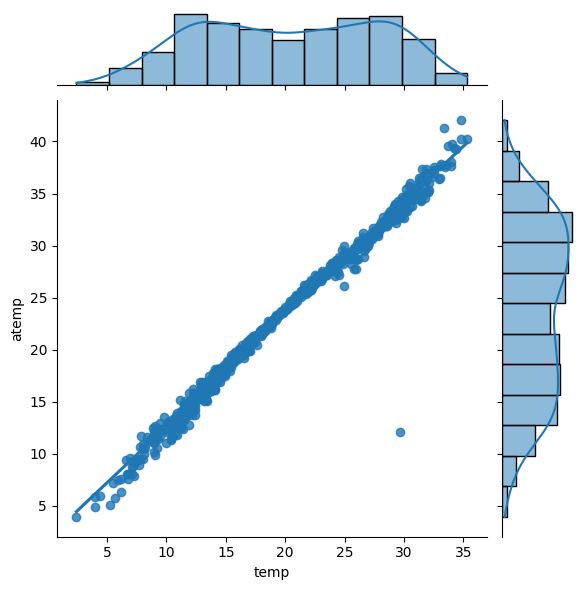

In [59]:
sns.jointplot(data=df, x='temp', y='atemp', kind='reg')
plt.show()

## 7. Ящик с усами 

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: В некоторых месяцах чаще берут велосипеды в будний день для поездок на работу или учебу. Летом, люди предпочитают проводить свободное время на свежем воздухе, что увеличивает количество прокатов в выходные дни. Это связано с благоприятными погодными условиями.

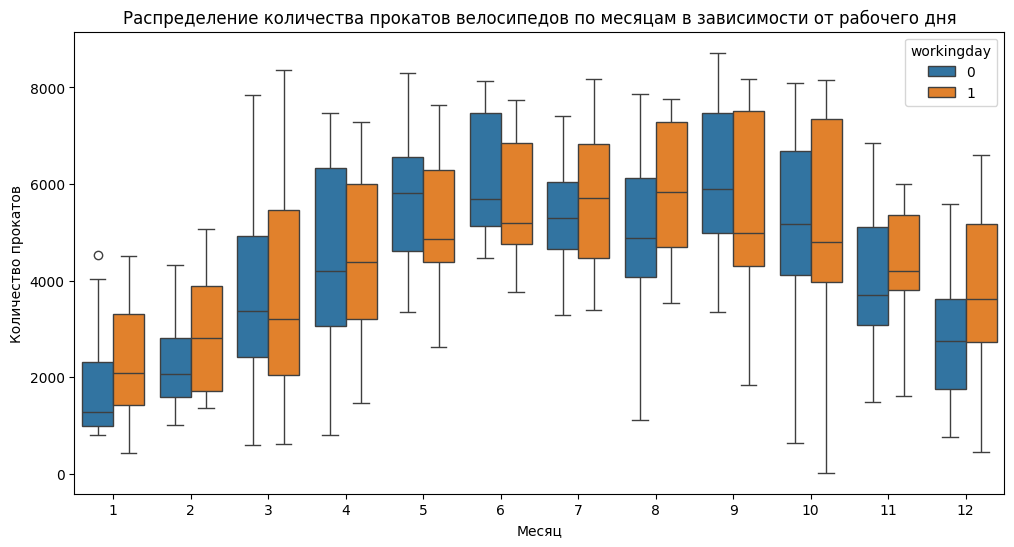

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='mnth', y='cnt', hue='workingday')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.title('Распределение количества прокатов велосипедов по месяцам в зависимости от рабочего дня')
plt.show()

## 8. Хитрый вопрос 

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Может быть, что соотношение между разницой температур и скорость ветра - экспоненциальный

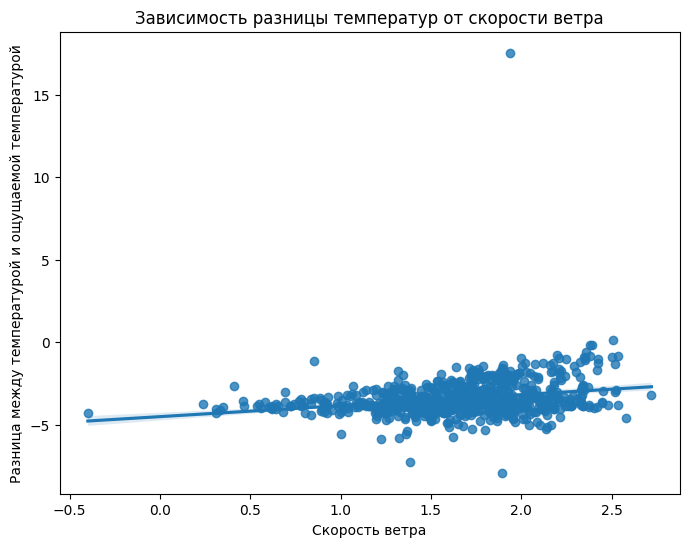

In [67]:
df['temp_diff'] = df['temp'] - df['atemp']
df['windspeed_log'] = np.log(df['windspeed(ms)'])
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='windspeed_log', y='temp_diff')
plt.xlabel('Скорость ветра')
plt.ylabel('Разница между температурой и ощущаемой температурой')
plt.title('Зависимость разницы температур от скорости ветра')
plt.show()